In [32]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler
#globals
TOTAL_FEATURES = 8
BACK_CANDLES = 100
FUTURE_DAYS = 10

def create_stock_dictionary():
    dictionary = {}
    current_directory = os.getcwd()
    folder_name = 'S&P500'
    folder_path = os.path.join(current_directory, folder_name)

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            name = file_name.split("_")[0]
            file_path = os.path.join(folder_path, file_name)
            dictionary[name] = pd.read_csv(file_path)
            
    return dictionary

In [33]:
import random
stock_data = create_stock_dictionary()


In [34]:
from sklearn.model_selection import train_test_split
n_days = BACK_CANDLES
m_days = FUTURE_DAYS
stock_data_training = {}
stock_data_testing = {}

#split data for training
for i in stock_data.keys():
    #add more features here
    stock_data[i].rename(columns = {'Datetime':'Date'}, inplace = True)
    stock_data[i]['MACD'] = ta.macd(stock_data[i]['Close'])['MACD_12_26_9']
    stock_data[i]['OBV'] = ta.obv(stock_data[i]['Close'], stock_data[i]['Volume'])
    stock_data[i]['RSI'] = ta.rsi(stock_data[i]['Close'])
    stock_data[i]["TargetNextClose"] = stock_data[i]["Adj Close"].shift(-1)
    stock_data[i].drop(['Close', 'Volume'], axis=1, inplace=True)
    
    #change scaling algorithm
    scaler = MinMaxScaler()
    for k in range(1, stock_data[i].shape[1]):
        column_data = stock_data[i].iloc[:, k].values.reshape(-1, 1)
        stock_data[i].iloc[:, k] = scaler.fit_transform(column_data)
    
    stock_data_training[i], stock_data_testing[i] = train_test_split(stock_data[i], test_size=0.2, shuffle=False)


In [38]:
#code that lets you select which stocks you want to train on, so you can use other stocks to train
vals = stock_data_training.keys()
training_vals = random.sample(list(vals), 20)
training_df_list = []
for key in stock_data_training.keys():
    for item in training_vals:
        if(key == item):
            training_df_list.append(stock_data_training[key])
            

stacked_stock_data = pd.concat(training_df_list, ignore_index=True, axis=0)
stacked_stock_data = stacked_stock_data.dropna()
stacked_stock_data



,Date,Open,High,Low,Adj Close,MACD,OBV,RSI,TargetNextClose
25,2022-04-12 13:30:00-04:00,0.586450,0.580745,0.571889,0.570747,0.370675,0.564465,0.395615,0.573161
26,2022-04-12 14:30:00-04:00,0.570747,0.573246,0.570680,0.573161,0.375092,0.576897,0.409791,0.580302
27,2022-04-12 15:30:00-04:00,0.573105,0.577866,0.575114,0.580302,0.386583,0.588687,0.451868,0.594449
28,2022-04-13 09:30:00-04:00,0.578562,0.588645,0.572427,0.594449,0.409292,0.609293,0.528512,0.607922
29,2022-04-13 10:30:00-04:00,0.594460,0.603374,0.592784,0.607922,0.439973,0.622082,0.592738,0.618029
...,...,...,...,...,...,...,...,...,...
53499,2023-10-17 09:30:00-04:00,0.839433,0.855742,0.850774,0.839406,0.677410,0.445927,0.674767,0.843505
53500,2023-10-17 10:30:00-04:00,0.839525,0.854775,0.858283,0.843505,0.671952,0.457678,0.684715,0.830069
53501,2023-10-17 11:30:00-04:00,0.842379,0.844737,0.850806,0.830069,0.659456,0.450817,0.628320,0.810804
53502,2023-10-17 12:30:00-04:00,0.828844,0.824938,0.838374,0.810804,0.638966,0.444986,0.554183,0.793405


In [39]:
xs, ys = [], []
#for actuallly training data
for i in range(len(stacked_stock_data) - n_days - m_days + 1): 

    v = stacked_stock_data.iloc[i:(i + n_days), :-1]

    if v['Date'].iloc[-1] <= v['Date'].iloc[0]: 
        continue

    xs.append(v.iloc[:, 1:].to_numpy())
    ys.append(stacked_stock_data.iloc[i + n_days:i + n_days + m_days, len(stacked_stock_data.columns) - 1])
xs = np.array(xs)
ys = np.array(ys)


KeyboardInterrupt: 

In [8]:
xs[0]

array([[0.58645006, 0.5807445 , 0.57188926, 0.5707465 , 0.37067506,
        0.56446528, 0.39561536],
       [0.57074721, 0.57324587, 0.57067996, 0.57316093, 0.37509221,
        0.5768965 , 0.40979107],
       [0.57310504, 0.5778656 , 0.57511427, 0.58030185, 0.38658311,
        0.58868721, 0.45186758],
       [0.57856163, 0.58864483, 0.57242686, 0.59444902, 0.40929193,
        0.60929278, 0.52851246],
       [0.59445978, 0.60337442, 0.59278429, 0.60792248, 0.43997255,
        0.62208202, 0.59273761],
       [0.60793288, 0.61676489, 0.61045553, 0.61802881, 0.47375858,
        0.63528781, 0.6365334 ],
       [0.6180377 , 0.61676489, 0.61959153, 0.61964433, 0.50255548,
        0.64427384, 0.6434647 ],
       [0.61965461, 0.61132297, 0.61515721, 0.61587177, 0.52264974,
        0.63630154, 0.62046247],
       [0.6157473 , 0.61448854, 0.61737448, 0.62287803, 0.54463011,
        0.6456489 , 0.65334396],
       [0.6228099 , 0.61730042, 0.61959153, 0.61748852, 0.55756418,
        0.63491351, 0.6

In [10]:
X_test = []
Y_test = []

for key, df in stock_data_testing.items():
    if(key == 'WY'):
        if len(df) >= n_days + m_days:
            for i in range(len(df) - n_days - m_days + 1):
                X_test.append(df.iloc[i:i+n_days, 1:-1].to_numpy())

            for i in range(len(df) - n_days - m_days + 1):
                Y_test.append(df.iloc[i+n_days:i+n_days+m_days, -1].to_numpy())

X_test = np.array(X_test)
Y_test = np.array(Y_test)

X_test

array([[[0.17034064, 0.16260693, 0.17743553, ..., 0.58513375,
         0.52659275, 0.46441827],
        [0.17535071, 0.16293616, 0.17843997, ..., 0.57972558,
         0.51311984, 0.42730668],
        [0.15631264, 0.14944045, 0.15701369, ..., 0.5627226 ,
         0.50648867, 0.32331367],
        ...,
        [0.22311291, 0.21099406, 0.22821558, ..., 0.83924015,
         0.53598022, 0.64429125],
        [0.2217835 , 0.21263986, 0.22731842, ..., 0.82070005,
         0.53139845, 0.62883287],
        [0.21943888, 0.21263986, 0.227988  , ..., 0.80620261,
         0.54375163, 0.6439063 ]],

       [[0.17535071, 0.16293616, 0.17843997, ..., 0.57972558,
         0.51311984, 0.42730668],
        [0.15631264, 0.14944045, 0.15701369, ..., 0.5627226 ,
         0.50648867, 0.32331367],
        [0.14963259, 0.14121135, 0.15935729, ..., 0.55042683,
         0.51009698, 0.33320602],
        ...,
        [0.2217835 , 0.21263986, 0.22731842, ..., 0.82070005,
         0.53139845, 0.62883287],
        [0.2

In [15]:
from keras.layers import LSTM
from keras.layers import Dense
import tensorflow as tf
from keras import Sequential
from keras import optimizers
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Dense, GRU, LeakyReLU
import keras_tuner as kt
import keras
from keras_tuner import HyperParameters, RandomSearch

num_features = 7



In [ ]:
def build_model(hp):
    model = Sequential()
    # automatic tuning stuff (that hopefully works)
    num_layers = hp.Int('num_layers', 1, 3)
    for i in range(num_layers):
        model.add(LSTM(units=hp.Int('units_' + str(i), min_value=20, max_value=200, step=20),
                       activation='relu',
                       input_shape=(n_days, num_features) if i == 0 else None,
                       return_sequences=i < num_layers - 1))
    model.add(Dense(m_days, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    project_name='lstm_tuning'
)

tuner.search(xs, ys, epochs=5, batch_size=32, validation_split=0.2, callbacks=[keras.callbacks.EarlyStopping(patience=3)])
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best model architecture:")
best_model.summary()
print("Best hyperparameters:")
for param, val in best_hps.values.items():
    print(f"{param}: {val}")



In [16]:
model = Sequential()
num_layers = 1 #best_model['num_layers']
amount_of_units_0 = 140
amount_of_units_1 = 60
amount_of_units_2 = 80
amount_of_units = 0
for i in range(num_layers):
    model.add(LSTM(units= amount_of_units_1, #best_model['units_' + str(i)]
                    activation='relu',
                    input_shape=(n_days, num_features) if i == 0 else None,
                    return_sequences=i < num_layers - 1))
model.add(Dense(m_days, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

AttributeError: module 'keras.src.backend' has no attribute 'Variable'

In [ ]:
y_pred = model.predict(X_test)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [ ]:
y_pred.shape

(561, 10)

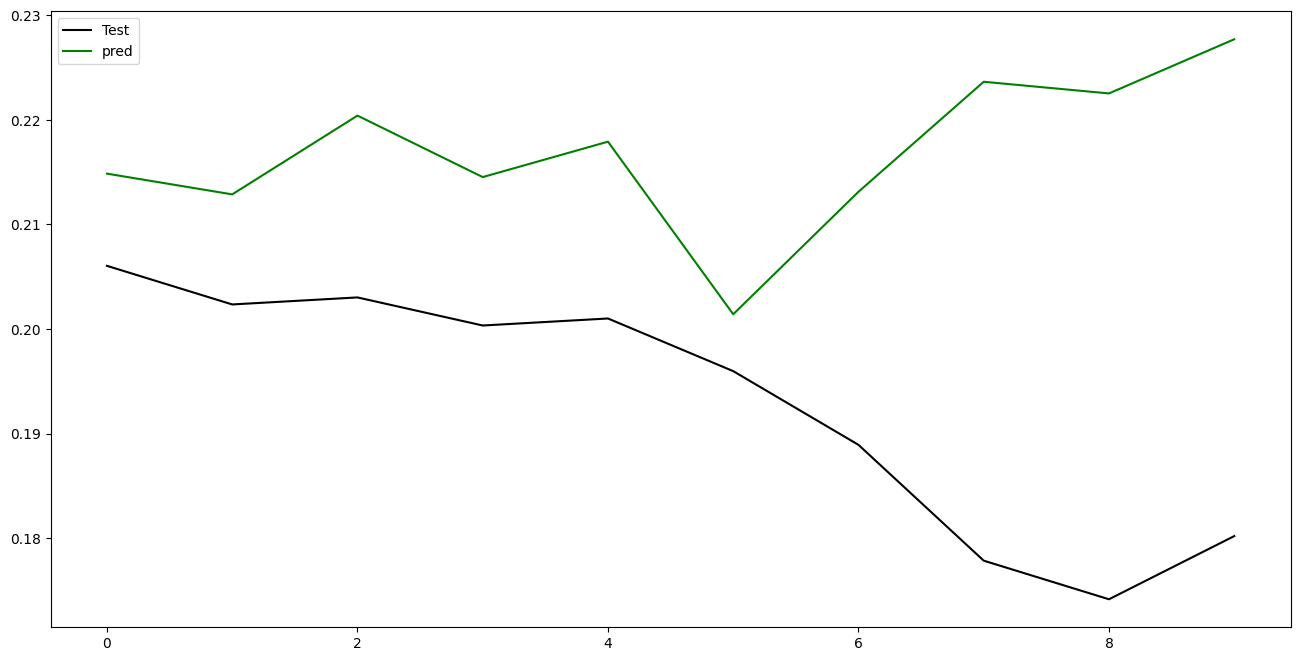

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(Y_test[0], color = 'black', label = 'Test')
plt.plot(y_pred[0], color = 'green', label = 'pred')
plt.legend()
plt.show()